In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [110]:
source_data = pd.read_csv('footballers-birthmonths.csv')
df = source_data.copy()

In [111]:
df.head()

,Player,Club,Nationality,Birthday
0,Shane Duffy,Brighton,Irish,1900-01-01
1,Jonny Evans,West Brom,Northern Irish,1900-01-02
2,James Milner,Liverpool,English,1900-01-04
3,Toni Kroos,Real Madrid,German,1900-01-04
4,Andy Carroll,West Ham,English,1900-01-06


Converting Birthday column to datetime

In [112]:
df['Birthday'] = pd.to_datetime(df['Birthday'])

In [113]:
df = df.drop(['Club','Nationality'],axis=1)

In [114]:
month_df =  df.groupby(pd.Grouper(key='Birthday',axis=0,freq='M')).count()

In [115]:
month_df

,Player
Birthday,
1900-01-31,32
1900-02-28,25
1900-03-31,27
1900-04-30,19
1900-05-31,27
1900-06-30,18
1900-07-31,18
1900-08-31,21
1900-09-30,23


<BarContainer object of 12 artists>

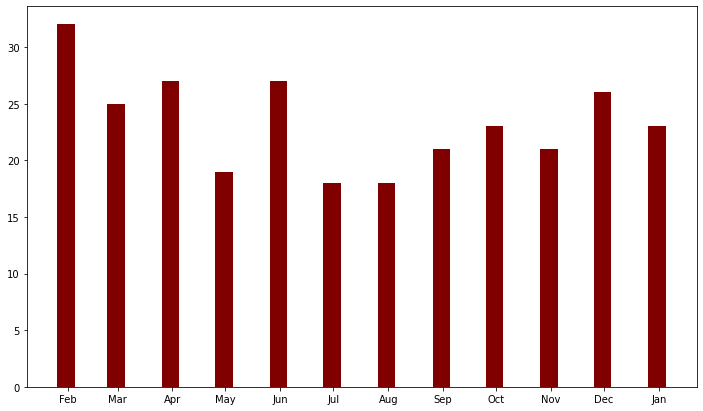

In [116]:
fig = plt.figure(figsize=(12, 7))
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.bar(month_df.index, month_df.Player, color = 'maroon', width=10)